### Steps in EDA
- Import necessary libraries
- Upload the data
- Understand the data
- Check missing and null values
- Segmentations of columns (options)
- Analysis
    - Univariate analysis (One variable at a time)
    - Bivariate analysis (Two variables at a time)
    - Multivariate analysis (More than two variables at a time)


## Importing of libraries

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Uploading the data

In [4]:
data  = pd.read_csv('titanic_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Understanding the data

In [5]:
survived = round(data.Survived.value_counts()[1]/(data.Survived.value_counts()[1]+data.Survived.value_counts()[0]),2)*100
print(f'Survived passengers: {survived}%')

Survived passengers: 38.0%


## Check missing and null values

In [6]:
100*data.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
#remove columns which have more than 40% of missing values
df = data.drop('Cabin', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
med=df.Age.median()
df.Age = df.Age.fillna(med) #run for 1 time only

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
df = df[~df.Embarked.isnull()]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

## Segmentation of columns

In [13]:
num_cols=["Age","Fare"]
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"] 
extra_cols=["PassengerId","Name","Ticket"]

In [14]:
df = df.drop(extra_cols, axis=1)

In [15]:
df.shape

(889, 8)

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## Univariate Analysis

Histplot of Age


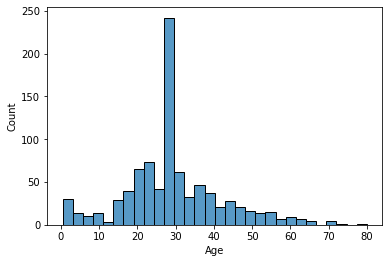

Histplot of Fare


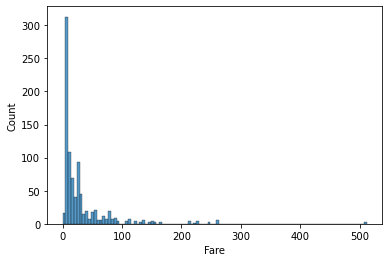

In [17]:
for i in num_cols:
    print(f'Histplot of {i}')
    sns.histplot(df[i])
    plt.show()

Boxplot of Age


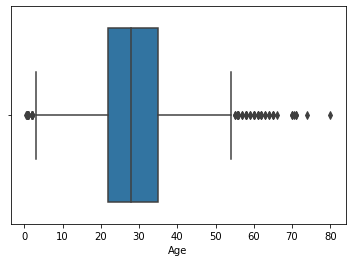

Boxplot of Fare


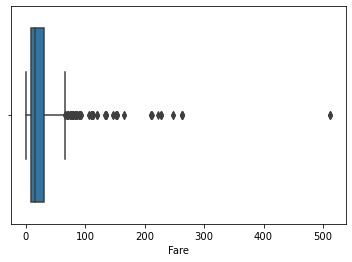

In [18]:
for i in num_cols:
    print(f'Boxplot of {i}')
    sns.boxplot(df[i])
    plt.show()

Countplot of Survived


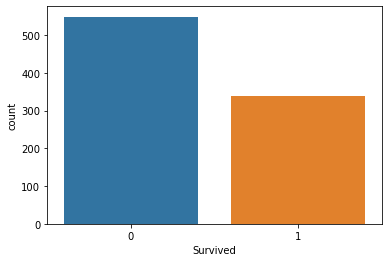

Countplot of Pclass


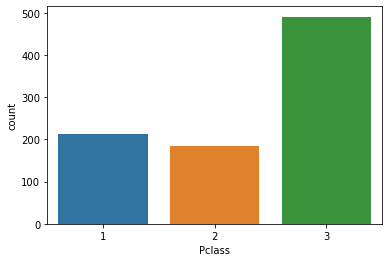

Countplot of Sex


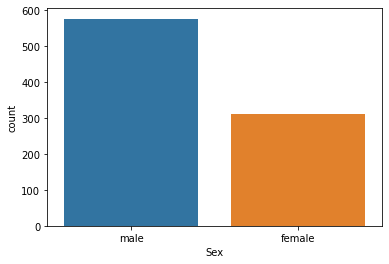

Countplot of SibSp


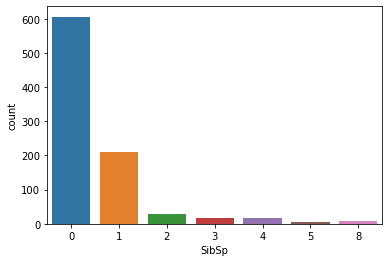

Countplot of Parch


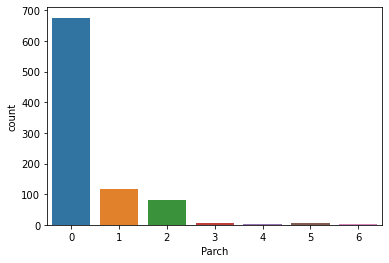

Countplot of Embarked


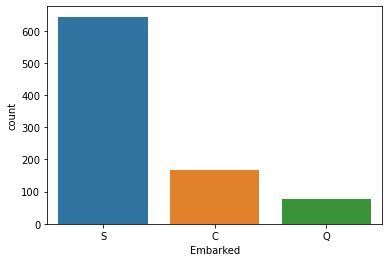

In [19]:
for i in cat_cols:
    print(f'Countplot of {i}')
    sns.countplot(df[i])
    plt.show()

## Bivariate Analysis

### Numerical Vs Numerical

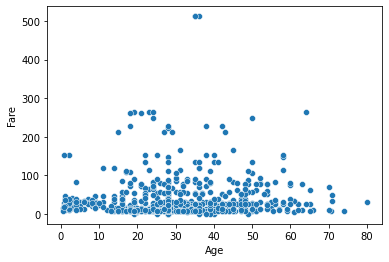

In [20]:
sns.scatterplot(x=df.Age, y=df.Fare)
plt.show()

### Numerical Vs Categorical

Boxplot of Survived and Age


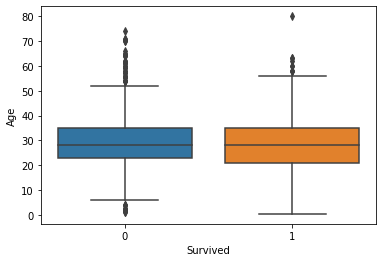

Boxplot of Survived and Fare


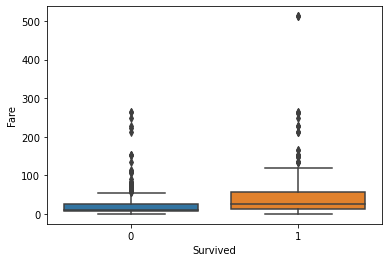

Boxplot of Pclass and Age


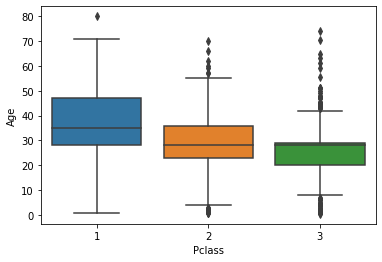

Boxplot of Pclass and Fare


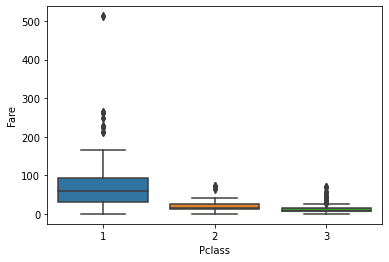

Boxplot of Sex and Age


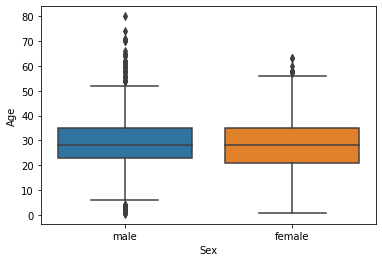

Boxplot of Sex and Fare


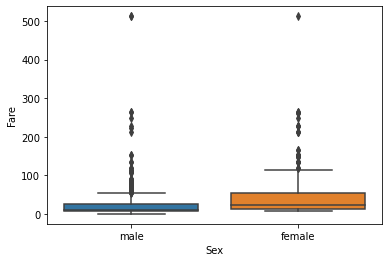

Boxplot of SibSp and Age


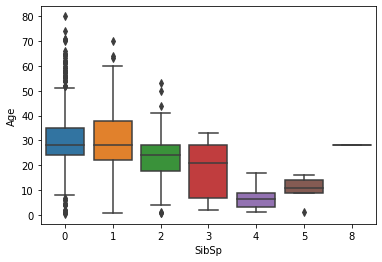

Boxplot of SibSp and Fare


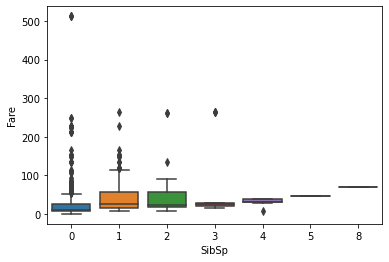

Boxplot of Parch and Age


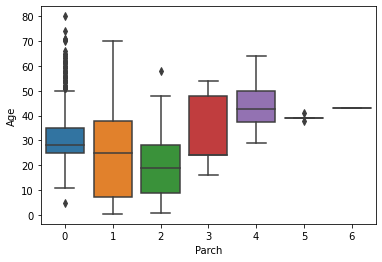

Boxplot of Parch and Fare


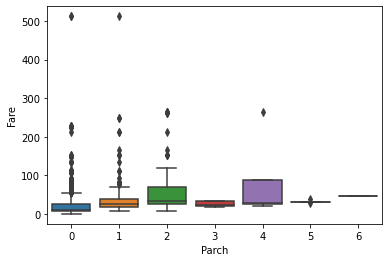

Boxplot of Embarked and Age


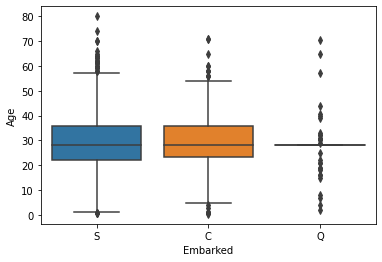

Boxplot of Embarked and Fare


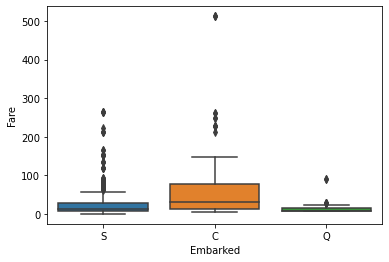

In [21]:
for col1 in cat_cols:
    for col2 in num_cols:
        if col1!=col2:
            print(f'Boxplot of {col1} and {col2}')
            sns.boxplot(x=df[col1],y=df[col2])
            plt.show()

### write three insights from univariate
- Mostly passengers travelling in titanic were died
- mostly passengers travelling in titanic were male
- Mostly passengers opted for 3rd class

### write three insights from bivariate
- People who opted for first class ticket were slightly on older side than 2nd class and 3rd class
- The travellers are mostly aged between 30-40 where both share same ratio in gender
- People from age 30-50 were travelling with 3 other people which were either their parents or children
- Mostly people opted for 

## Multivariate Analysis

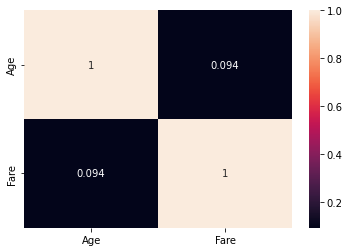

In [23]:
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()